In [1]:
import os
import os.path as op
# import mne
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

## Decode from wavelets

In [2]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if 'no_crop' not in file.name:
        continue
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 751:
        print(file)
        print(f'Wrong shape: {len(value)} instead of 751')
        continue
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

### Plot

In [3]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

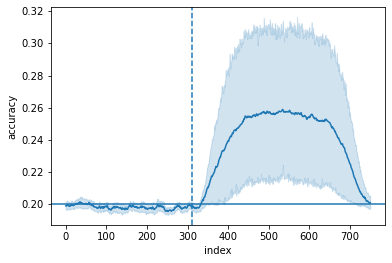

In [4]:
# Plot
graph = sns.lineplot(data = df_sns, x = "index", y = "accuracy")
graph.axhline(0.2)
graph.axvline(310, linestyle = 'dashed')

### Tests

In [5]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]
x = list(range(1, len(p)+1))

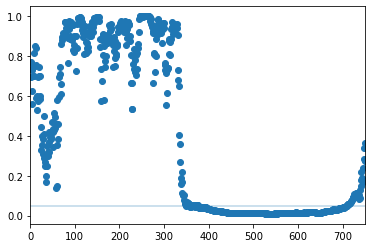

In [6]:
plt.scatter(x, p)
plt.plot([-1, 760],[0.05, 0.05], alpha = 0.3)
plt.xlim(0, 750)
plt.show()

## Decoder from stft

In [7]:
data = {}
root = Path('../data/bids/derivatives/decoding')
for file in root.rglob("*"):
    if 'stft_scores' not in file.name:
        continue
    if 'sub-2_' in file.name:
        print(f"Skipping {file}")
        continue
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

### Plot

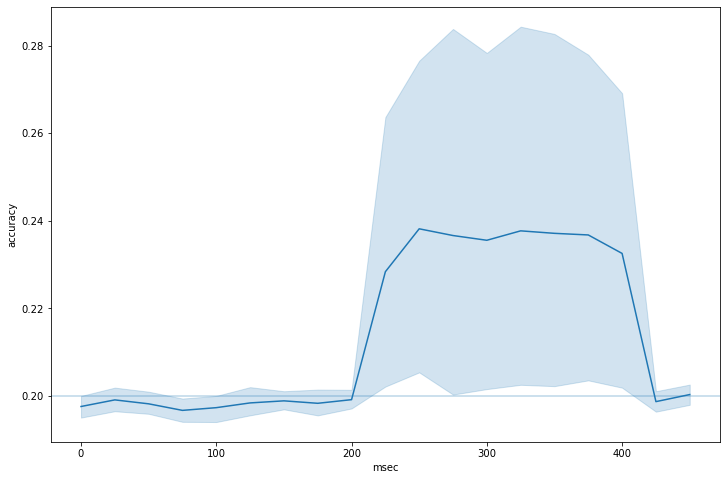

In [20]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

# Change x-axis from window number to msec
df_sns['msec'] = df_sns['index']*25

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.axhline(y = 0.2, alpha = 0.3) 
sns.lineplot(data = df_sns, x = "msec", y="accuracy", ax = ax)

# Save
fig = ax.get_figure()
fig.savefig('../figs/decode_with_stft.png', dpi = 600)

### Tests

In [9]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]
x = list(range(1, len(p)+1))

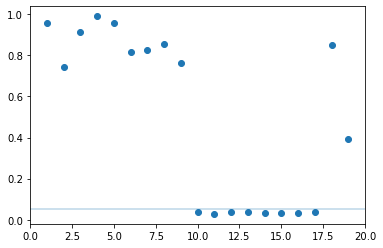

In [10]:
plt.scatter(x, p)
plt.plot([-1,20],[0.05,0.05], alpha = 0.3)
plt.xlim(0, 20)
plt.show()